In [1]:
import gymnasium as gym 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
env = gym.make("Taxi-v3")
env.reset()
env.render()

c:\Users\aarya\AppData\Local\Programs\Python\Python310\lib\site-packages\gymnasium\envs\toy_text\taxi.py:314: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("Taxi-v3", render_mode="rgb_array")
  gym.logger.warn(


In [3]:
num_rows= env.observation_space.n
num_columns= env.action_space.n 

qtable_MC = np.zeros((num_rows,num_columns))
qtable_TD = np.zeros((num_rows,num_columns))

returns = np.zeros((num_rows,num_columns))
N = np.zeros((num_rows,num_columns))


In [4]:
episode_MC=5000
alpha_MC=0.5
gamma_MC=0.9
epsilon_MC=0.1
cumulative_rewards_MC = np.zeros(episode_MC)

In [5]:
outcomes_MC = []

for i in range(episode_MC):
    state=env.reset()
    done= False
    state=state[0]
    curr_outcome="Failure"
    episode_data = []
    outcomes_MC.append(curr_outcome)
    
    while not done:
        if np.random.uniform(0,1) < epsilon_MC:
            action= env.action_space.sample()
        elif np.max(qtable_MC[state]) > 0 :
            action = np.argmax(qtable_MC[state])
        else:
            action = env.action_space.sample()
            
        next_state,reward,terminated,truncated,info=env.step(action)    
        done = truncated or terminated
        episode_data.append((next_state, action, reward))
        state = next_state
        cumulative_rewards_MC[i] += reward
        if reward==20:
            outcomes_MC[-1]= "Success"
    G = 0
    for t in range(len(episode_data)-1, -1, -1):
        state, action, reward = episode_data[t]
        G = gamma_MC * G + reward
        N[state][action] += 1
        returns[state][action] += alpha_MC*(G - returns[state][action])
        qtable_MC[state][action] = returns[state][action]
        

In [6]:
episode_TD=5000
alpha_TD=0.5
gamma_TD=0.9
epsilon_TD=0.1

cumulative_rewards_TD = np.zeros(episode_TD)

In [7]:

outcomes_TD = []

for i in range(episode_MC):
    state=env.reset()
    done= False
    state=state[0]
    curr_outcome="Failure"
    outcomes_TD.append(curr_outcome)
    
    while not done:
        if np.random.uniform(0,1) < epsilon_TD:
            action= env.action_space.sample()
        elif np.max(qtable_TD[state]) > 0 :
            action = np.argmax(qtable_TD[state])
        else:
            action = env.action_space.sample()
            
        new_state,reward,terminated,truncated,info=env.step(action)    
        done = truncated or terminated
        qtable_TD[state][action] += alpha_TD * (reward + gamma_TD * np.max(qtable_TD[new_state]) - qtable_TD[state][action])
        state = new_state
        cumulative_rewards_TD[i] += reward
        
        if reward==20:
            outcomes_TD[-1]= "Success"



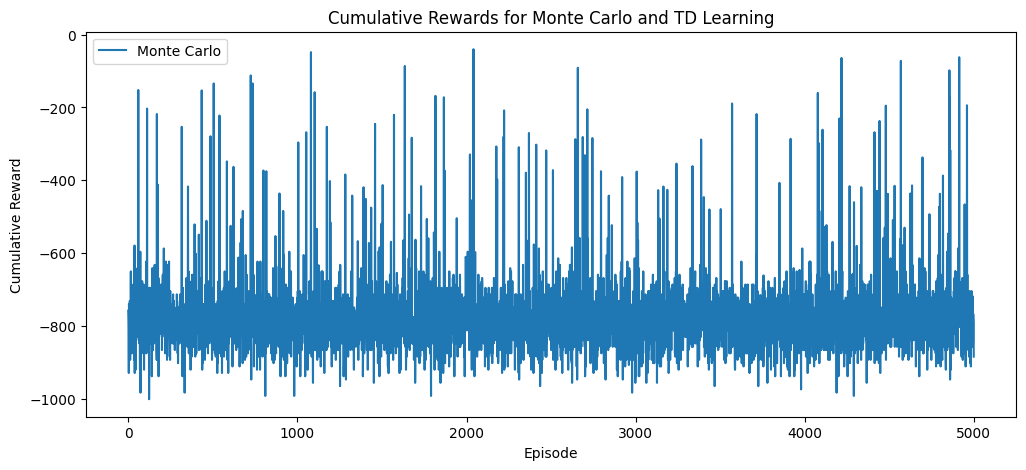

In [8]:
plt.figure(figsize=(12,5))
plt.plot(range(5000), cumulative_rewards_MC, label='Monte Carlo')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards for Monte Carlo and TD Learning')
plt.legend()
plt.show()

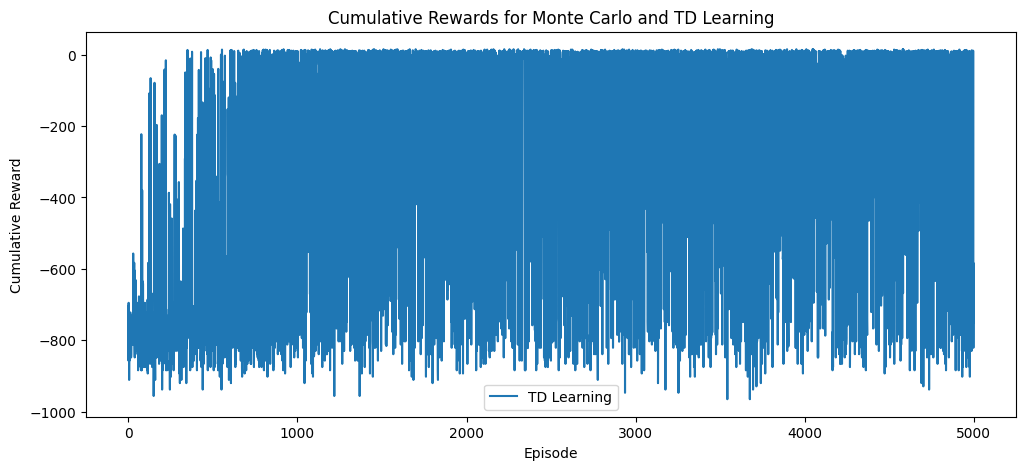

In [9]:
plt.figure(figsize=(12,5))
plt.plot(range(5000), cumulative_rewards_TD, label='TD Learning')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards for Monte Carlo and TD Learning')
plt.legend()
plt.show()

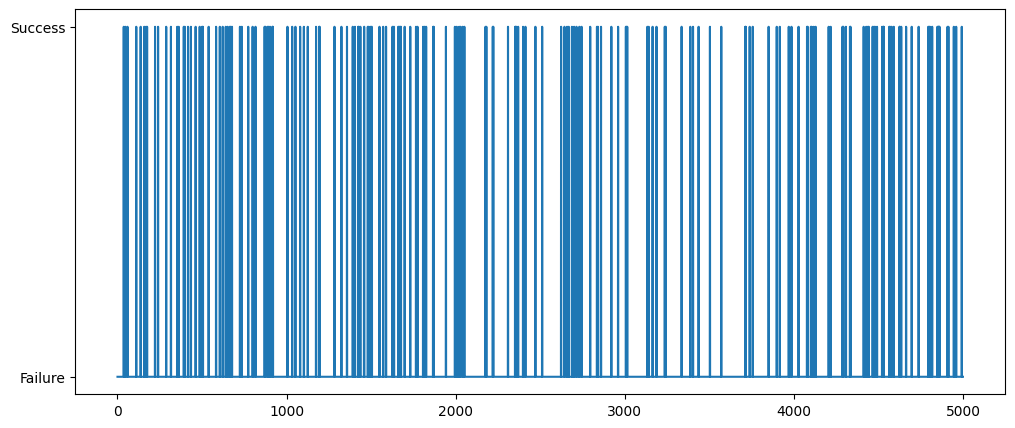

In [10]:
plt.figure(figsize=(12,5))
plt.plot(range(5000),outcomes_MC)

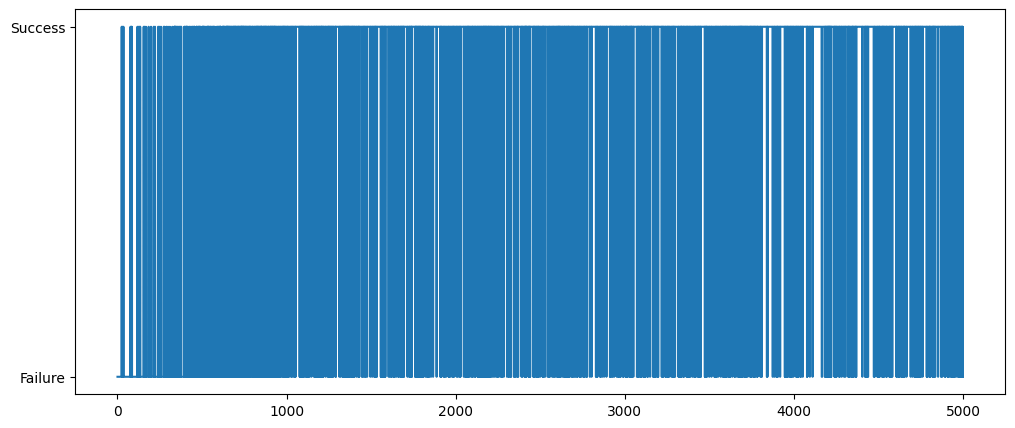

In [11]:
plt.figure(figsize=(12,5))
plt.plot(range(5000),outcomes_TD)

In [12]:
print(qtable_TD)

[[  0.           0.           0.           0.           0.
    0.        ]
 [ -0.64737428   0.2562713   -0.70421917  -0.40097975   1.62261467
   -8.56788938]
 [  4.11003396   5.42380111   4.28993804   5.87775655   7.7147
   -3.18958003]
 ...
 [ -2.31779297  -0.61092187   1.21220852   5.94319853 -10.89478594
   -7.80516111]
 [ -2.18895834  -2.18010355  -4.46177702   2.81217499 -11.19549928
  -11.26430586]
 [  6.31698084  -0.75         6.33455896  16.99972558 -10.57578125
   -4.00136719]]


In [13]:
print(qtable_MC)

[[  0.           0.           0.           0.           0.
   20.        ]
 [  0.         -34.43605821   0.         -27.23748438   0.
  -33.47720799]
 [  0.         -28.1467302    0.         -33.08290677   0.
  -32.36722635]
 ...
 [-35.91424237   0.         -31.73011046   0.         -46.08650169
  -36.14360354]
 [-34.06743932   0.         -29.46409943   0.         -40.97567317
  -37.8794837 ]
 [-26.72480146   0.         -21.69379935   0.         -23.51509093
  -37.50616773]]


In [14]:
import json
qtable_MC_Taxi = qtable_MC.tolist()  # Convert numpy array to a nested Python list

# Save the Q-table or Q-values to a JSON file
with open('qtable_MC_Taxi_2.json', 'w') as f:
    json.dump(qtable_MC_Taxi, f)


In [15]:
import json
qtable_TD_Taxi = qtable_TD.tolist()  # Convert numpy array to a nested Python list

# Save the Q-table or Q-values to a JSON file
with open('qtable_TD_Taxi_2.json', 'w') as f:
    json.dump(qtable_TD_Taxi, f)
